In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import acf, pacf


In [2]:
# Load the data from CSV
df = pd.read_csv(r'abans_v0.1.csv') 
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

In [3]:
print(df.head())

        Date  Cashflow_Amount
0 2012-03-31         26731441
1 2012-06-30         61994170
2 2012-09-30         71994170
3 2012-12-31        108633183
4 2013-03-31        186053544


In [4]:
print(df.columns)
print(df.dtypes)

Index(['Date', 'Cashflow_Amount'], dtype='object')
Date               datetime64[ns]
Cashflow_Amount             int64
dtype: object


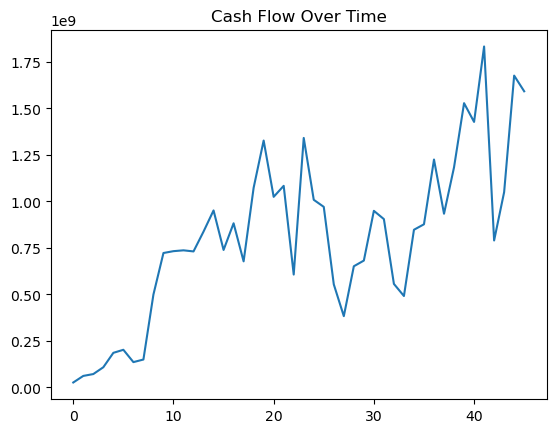

In [5]:
# Plot the data
plt.plot(df['Cashflow_Amount'])
plt.title('Cash Flow Over Time')
plt.show()

In [6]:
# Check for stationarity
result = adfuller(df['Cashflow_Amount'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.5365665068579464
p-value: 0.5153511498923135


In [7]:
# Differencing to make the time series stationary
df_diff = df.diff().dropna()

In [8]:
# ACF and PACF plots for parameter selection
acf_plot = acf(df_diff['Cashflow_Amount'], nlags=20)
pacf_plot = pacf(df_diff['Cashflow_Amount'], nlags=20)

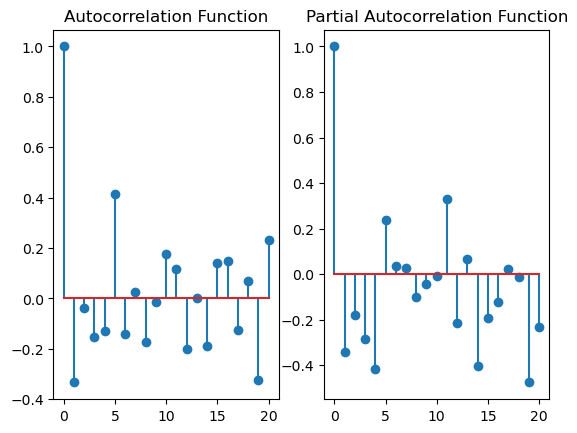

In [9]:
# Plot ACF
plt.subplot(121)
plt.stem(acf_plot)
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.stem(pacf_plot)
plt.title('Partial Autocorrelation Function')

plt.show()


                                     SARIMAX Results                                     
Dep. Variable:                   Cashflow_Amount   No. Observations:                   46
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -863.135
Date:                           Wed, 15 Nov 2023   AIC                           1736.270
Time:                                   10:24:46   BIC                           1744.838
Sample:                                        0   HQIC                          1739.390
                                            - 46                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1707      0.824      0.207      0.836      -1.444       1.785
ma.L1         -0.6697      0.586     -1.144

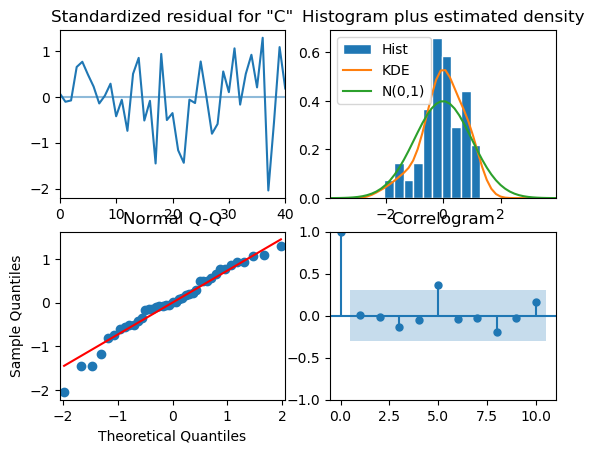

In [10]:
# Build and fit the SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 4)  # Replace with appropriate values

model = SARIMAX(df['Cashflow_Amount'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Print model summary and diagnostics
print(results.summary())
results.plot_diagnostics()
plt.show()


In [11]:
# Forecast the next 4 quarters
forecast_steps = 4
forecast = results.get_forecast(steps=forecast_steps)

# Determine the starting date for the forecast
max_date = df['Date'].max()
start_date = max_date + pd.DateOffset(months=3)  # Next quarter

# Create a new DataFrame with forecasted values
forecast_dates = pd.date_range(start=start_date, periods=forecast_steps, freq='Q')
df_forecasted = pd.DataFrame({'Date': forecast_dates, 'Cashflow_Amount': forecast.predicted_mean.values.astype(int)})


NameError: name 'max_quarter' is not defined

In [12]:
df.head()

,Date,Cashflow_Amount
0,2012-03-31,26731441
1,2012-06-30,61994170
2,2012-09-30,71994170
3,2012-12-31,108633183
4,2013-03-31,186053544


In [13]:
# Concatenate the forecasted values with the original data
df_forecasted_full = pd.concat([df, df_forecasted])

NameError: name 'df_forecasted' is not defined

In [14]:
# Plot the results
plt.plot(df_forecasted_full['Date'], df_forecasted_full['Cashflow_Amount'])
plt.title('Cash Flow Forecast Including Historical Data')
plt.legend()
plt.show()

# Display the dataframe with forecasted values
print(df_forecasted)

NameError: name 'df_forecasted_full' is not defined

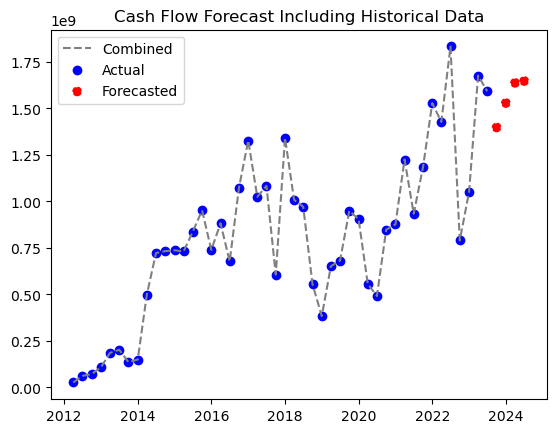

        Date  Cashflow_Amount
0 2023-09-30       1397817410
1 2023-12-31       1529251759
2 2024-03-31       1637489877
3 2024-06-30       1647414707


In [169]:
# Plot the results with connected lines
plt.plot(df_forecasted_full['Date'], df_forecasted_full['Cashflow_Amount'], label='Combined', color='gray', linestyle='--')
plt.scatter(df['Date'], df['Cashflow_Amount'], label='Actual', color='blue')
plt.scatter(df_forecasted['Date'], df_forecasted['Cashflow_Amount'], label='Forecasted', color='red', linestyle='--')
plt.title('Cash Flow Forecast Including Historical Data')
plt.legend()
plt.show()


print(df_forecasted)

In [16]:
# Assume these are additional external parameters
external_params = ['GDP_growth', 'Unemployment_Rate', 'Central_Bank_Base_Rate', 'Inflation_Rate', 'Depreciation_Rate']


In [17]:
# Select external parameters
exog_variables = df[external_params]

KeyError: "None of [Index(['GDP_growth', 'Unemployment_Rate', 'Central_Bank_Base_Rate',\n       'Inflation_Rate', 'Depreciation_Rate'],\n      dtype='object')] are in the [columns]"

In [18]:
# Select external parameters
exog_variables = df[external_params]

# Fit the SARIMA model with multiple external parameters
model = SARIMAX(df['Cashflow_Amount'], order=order, seasonal_order=seasonal_order, exog=exog_variables)
results = model.fit()

KeyError: "None of [Index(['GDP_growth', 'Unemployment_Rate', 'Central_Bank_Base_Rate',\n       'Inflation_Rate', 'Depreciation_Rate'],\n      dtype='object')] are in the [columns]"